In [34]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.core.operations import SymmOp
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import Image

In [38]:
with MPRester("xAixBxXBVwN8D32SEfC8") as m:

    structure = m.get_structure_by_material_id("mp-10378")
view = quick_view(structure) 
display(view)
structure_dict = structure.as_dict()
SA_structure = SpacegroupAnalyzer(structure)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [29]:
symétries = SpacegroupAnalyzer(structure).get_symmetry_operations()
#print(symétries)

In [4]:
Cs1 = structure_dict.get('sites')[0]['abc']
Cs2 = structure_dict.get('sites')[1]['abc']
Sb = structure_dict.get('sites')[2]['abc']
print("position Cs1", Cs1)
print("position Cs2", Cs2)
print("position Sb", Sb)

position Cs1 [0.75, 0.75, 0.75]
position Cs2 [0.25, 0.25, 0.25]
position Sb [0.5, 0.5, 0.5]


In [30]:
#symétries choisies

sym_Cs1 = SpacegroupAnalyzer(structure).get_symmetry_operations()[12]
#print("matrice de la symétrie sur Cs1\n", sym_Cs1)
sym_Cs2 = SpacegroupAnalyzer(structure).get_symmetry_operations()[43]
#print("matrice de la symétrie sur Cs2\n", sym_Cs2)
sym_Sb = SpacegroupAnalyzer(structure).get_symmetry_operations()[28]
#print("matrice de la symétrie sur Sb\n", sym_Sb)


In [14]:
Cs1coord = [0.75, 0.75, 0.75]
Cs2coord = [0.25, 0.25, 0.25]
Sbcoord = [0.5, 0.5, 0.5]

#symétries appliquées
Cs1_nv = sym_Cs1.operate(Cs1coord)
Cs2_nv = sym_Cs2.operate(Cs2coord)
Sb_nv = sym_Sb.operate(Sbcoord)

SYMETRIE ATOME CS1, matrice et vecteur translation:
 Rot:
[[ 0.  0.  1.]
 [-1. -1. -1.]
 [ 1.  0.  0.]]
tau
[0. 0. 0.] 

C'est une inversion C2

position initiale: [0.75, 0.75, 0.75]
position finale: [ 0.75 -2.25  0.75]


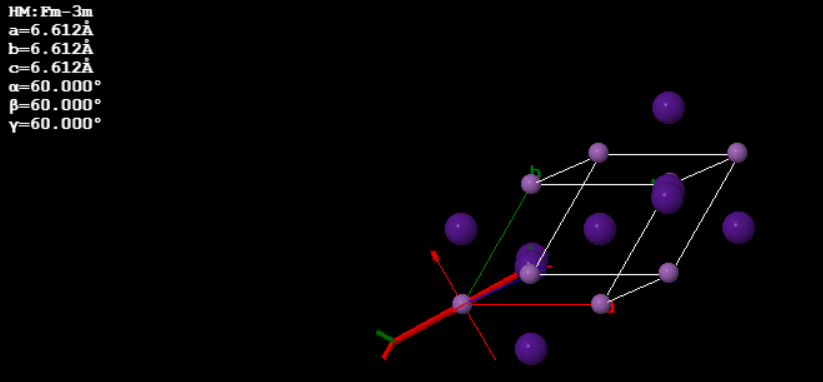

In [35]:
print("SYMETRIE ATOME CS1, matrice et vecteur translation:\n", sym_Cs1, "\n")
print("C'est une inversion C2\n")
print("position initiale:", Cs1)
print("position finale:", Cs1_nv)

Image(filename="image_C2.png")

SYMETRIE ATOME CS2, matrice et vecteur translation:
 Rot:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
tau
[0. 0. 0.] 

C'est une réflexion du plan (x,y,z)

position initiale: [0.25, 0.25, 0.25]
position finale: [-0.75  0.25  0.25]


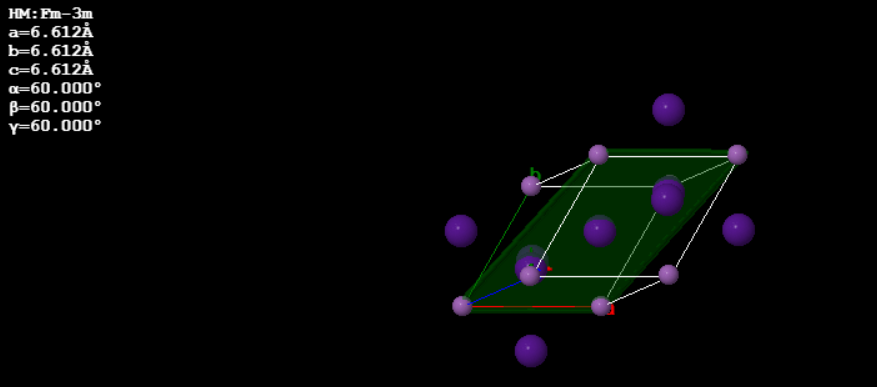

In [36]:
print("SYMETRIE ATOME CS2, matrice et vecteur translation:\n", sym_Cs2, "\n")
print("C'est une réflexion du plan (x,y,z)\n")
print("position initiale:", Cs2)
print("position finale:", Cs2_nv)
Image(filename="mirorplane.png")

SYMETRIE ATOME Sb, matrice et vecteur translation:
 Rot:
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [-1. -1. -1.]]
tau
[0. 0. 0.] 

C'est une rotation C3

position initiale: [0.5, 0.5, 0.5]
position finale: [ 0.5  0.5 -1.5]


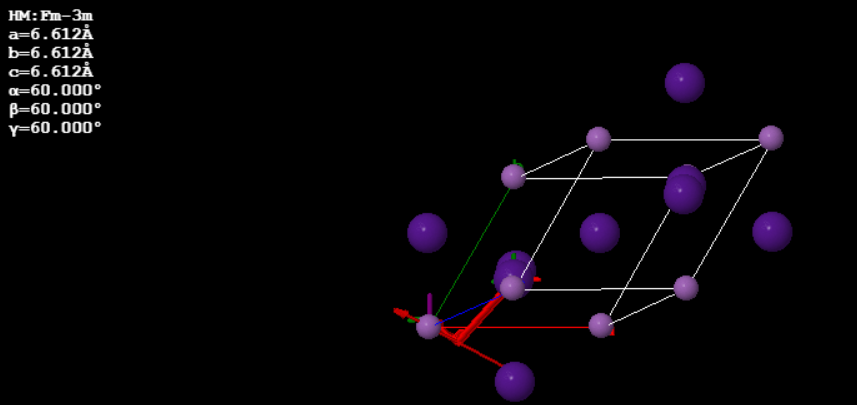

In [37]:
print("SYMETRIE ATOME Sb, matrice et vecteur translation:\n", sym_Sb, "\n")
print("C'est une rotation C3\n")
print("position initiale:", Sb)
print("position finale:", Sb_nv)
Image(filename="C3.png")